In [20]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data from the webpage into a DataFrame
url='https://www.boxofficemojo.com/year/2022/?area=ZA&grossesOption=calendarGrosses&sort=gross'

req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [21]:
df.head() #display the first five

,Rank,Release,Genre,Budget,Running Time,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated
0,1,Spider-Man: No Way Home,-,-,-,"$2,972,601",170,"$6,204,011",Dec 17,Ster-Kinekor Pictures,False
1,2,Uncharted,-,-,-,"$1,370,383",130,"$1,370,383",Feb 18,Ster-Kinekor Pictures,False
2,3,The Batman,-,-,-,"$1,367,366",115,"$1,367,366",Mar 4,Universal Pictures,False
3,4,Sing 2,-,-,-,"$1,284,746",127,"$1,660,472",Dec 24,United International Pictures (UIP),False
4,5,Doctor Strange in the Multiverse of Madness,-,-,-,"$690,156",170,"$690,156",May 6,Ster-Kinekor Pictures,False


In [22]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          63 non-null     int64 
 1   Release       63 non-null     object
 2   Genre         63 non-null     object
 3   Budget        63 non-null     object
 4   Running Time  63 non-null     object
 5   Gross         63 non-null     object
 6   Theaters      63 non-null     int64 
 7   Total Gross   63 non-null     object
 8   Release Date  63 non-null     object
 9   Distributor   63 non-null     object
 10  Estimated     63 non-null     bool  
dtypes: bool(1), int64(2), object(8)
memory usage: 5.1+ KB


In [23]:
#replace characters from Gross and Total Gross columns

df['Gross']=df['Gross'].str.replace(r'$','').str.replace(r',','')
df['Total Gross']=df['Total Gross'].str.replace(r'$','').str.replace(r',','')
df[['Gross','Total Gross']]

C:\Users\khuma\AppData\Local\Temp/ipykernel_14520/1486351579.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Gross']=df['Gross'].str.replace(r'$','').str.replace(r',','')
C:\Users\khuma\AppData\Local\Temp/ipykernel_14520/1486351579.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total Gross']=df['Total Gross'].str.replace(r'$','').str.replace(r',','')


,Gross,Total Gross
0,2972601,6204011
1,1370383,1370383
2,1367366,1367366
3,1284746,1660472
4,690156,690156
...,...,...
58,2448,2448
59,2282,244995
60,1719,1719
61,652,652


In [24]:
#change Gross and Total Gross Data types

df['Gross']=df['Gross'].astype('int64')
df['Total Gross']=df['Total Gross'].astype('int64')

df[['Gross','Total Gross']].dtypes

Gross          int64
Total Gross    int64
dtype: object

In [25]:

df.head()

,Rank,Release,Genre,Budget,Running Time,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated
0,1,Spider-Man: No Way Home,-,-,-,2972601,170,6204011,Dec 17,Ster-Kinekor Pictures,False
1,2,Uncharted,-,-,-,1370383,130,1370383,Feb 18,Ster-Kinekor Pictures,False
2,3,The Batman,-,-,-,1367366,115,1367366,Mar 4,Universal Pictures,False
3,4,Sing 2,-,-,-,1284746,127,1660472,Dec 24,United International Pictures (UIP),False
4,5,Doctor Strange in the Multiverse of Madness,-,-,-,690156,170,690156,May 6,Ster-Kinekor Pictures,False


In [26]:
#drop unwanted tables

df.drop(['Genre','Budget','Running Time','Estimated','Rank'], axis=1,inplace=True)
df.head()

,Release,Gross,Theaters,Total Gross,Release Date,Distributor
0,Spider-Man: No Way Home,2972601,170,6204011,Dec 17,Ster-Kinekor Pictures
1,Uncharted,1370383,130,1370383,Feb 18,Ster-Kinekor Pictures
2,The Batman,1367366,115,1367366,Mar 4,Universal Pictures
3,Sing 2,1284746,127,1660472,Dec 24,United International Pictures (UIP)
4,Doctor Strange in the Multiverse of Madness,690156,170,690156,May 6,Ster-Kinekor Pictures


In [30]:
#rename the movie column

df.rename(columns={'Release':'Movie Title'}, inplace = True)
df

,Movie Title,Gross,Theaters,Total Gross,Release Date,Distributor
0,Spider-Man: No Way Home,2972601,170,6204011,Dec 17,Ster-Kinekor Pictures
1,Uncharted,1370383,130,1370383,Feb 18,Ster-Kinekor Pictures
2,The Batman,1367366,115,1367366,Mar 4,Universal Pictures
3,Sing 2,1284746,127,1660472,Dec 24,United International Pictures (UIP)
4,Doctor Strange in the Multiverse of Madness,690156,170,690156,May 6,Ster-Kinekor Pictures
...,...,...,...,...,...,...
58,The Electrical Life of Louis Wain,2448,1,2448,Apr 15,Universal Pictures
59,Ghostbusters: Afterlife,2282,99,244995,Nov 19,Ster-Kinekor Pictures
60,Cyrano,1719,8,1719,Mar 11,Universal Pictures
61,Sodium Day,652,14,652,Apr 22,Indigenous Film Distribution


In [32]:
#sorting movies by total gross

df1 = df[['Movie Title','Total Gross']].sort_values(ascending=False,by ='Total Gross')
df1.head()

,Movie Title,Total Gross
0,Spider-Man: No Way Home,6204011
20,No Time to Die,1693754
3,Sing 2,1660472
1,Uncharted,1370383
2,The Batman,1367366


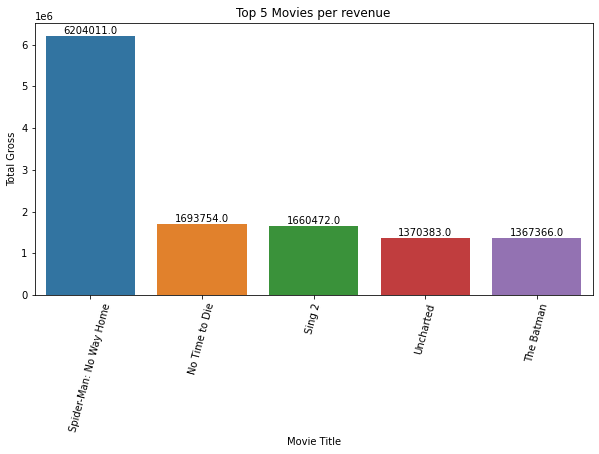

In [48]:
#plotting top five movies by revenue

#setting figure size
plt.figure(figsize=(10,5))

#plotting

ax = sns.barplot(x='Movie Title',y='Total Gross',data=df1.head(5))

#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Movie Title'],rotation=75)

#set the title
ax.set_title("Top 5 Movies per revenue")
#set x-axis
ax.set_ylabel("Total Gross")

#labelling bargraph
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()), ha='center', va='bottom')

<AxesSubplot:ylabel='Total Gross'>

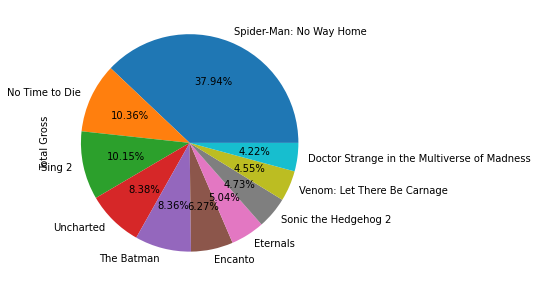

In [45]:
#pie chart

df1['Total Gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Movie Title'], figsize=(10,5))

In [46]:
#group movies by distributor

df2 = df.groupby('Distributor')['Movie Title', 'Total Gross'].sum()

C:\Users\khuma\AppData\Local\Temp/ipykernel_14520/2442333526.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby('Distributor')['Movie Title', 'Total Gross'].sum()


In [38]:
df2.sort_values(ascending=False,by ='Total Gross')

,Total Gross
Distributor,
Ster-Kinekor Pictures,13927347
United International Pictures (UIP),4632793
Universal Pictures,2764225
Times Media Films,855013
Paramount Pictures International,774149
Indigenous Film Distribution,122688
